# **Email Spam Classifier**

### **Team Members :** Aswin Balaji Thippa Ramesh, Gowri Sriram Lakshmanan, Pramod Krishnachari

In [25]:
! pip install wordcloud
!pip install gdown

### **Importing Necessary packages**

In [26]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import nltk
import re
import string
import nltk
from nltk.corpus import stopwords #Natural Language Toolkit
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import gdown
import plotly.express as px

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


### **Loading the data**

In [27]:
#Load data & print samples
df = pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### **EDA**

#### 1) Removal of irrelevant columns

In [28]:
#Let's drop the non-relevant unnamed columns
df=df.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],axis=1)

#### 2) Renaming Columns

In [29]:
# Renaming v1 & v2 as Category & Text
df=df.rename(columns={"v1":"Category","v2":"Text"})

#Sample post modifications
df.head()

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### 3) Shape of the dataset

In [30]:
#Let's check the length of the dataset
print(" Total number of rows in the dataset are", len(df))

 Total number of rows in the dataset are 5572


#### 4) Dataset Description

In [31]:
#Descriptive Summary of the dataset
df.describe()

,Category,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


#### 5) Checking class distribution

In [32]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming df is already defined
value_counts = df['Category'].value_counts()
labels = value_counts.index.tolist()
values = value_counts.values.tolist()

# Smooth neon palette
colors = ["#5eead4", "#2993ae", "#c4b5fd"]  # Teal, Peach, Lavender

# Create figure with subplots
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.4, 0.6],
    specs=[[{'type': 'domain'}, {'type': 'xy'}]],
    horizontal_spacing=0.15
)

# Donut chart
fig.add_trace(go.Pie(
    labels=labels,
    values=values,
    hole=0.55,
    marker=dict(
        colors=colors,
        line=dict(color='rgba(255,255,255,0.5)', width=2)  # soft glow effect
    ),
    hoverinfo="label+value+percent",
    textinfo='percent',
    textfont=dict(size=15, color='Black'),
    pull=[0.03] * len(labels),
), row=1, col=1)

# Bar chart
fig.add_trace(go.Bar(
    x=values,
    y=labels,
    orientation='h',
    text=[f"{val} ({(val/sum(values))*100:.1f}%)" for val in values],
    textposition='outside',
    marker=dict(
        color=colors,
        line=dict(color='rgba(255,255,255,0.6)', width=1.5)  # softer bar outline
    ),
), row=1, col=2)

# Layout
fig.update_layout(
    title='Spam vs Ham: Dashboard',
    title_font=dict(size=22, color='Black'),
    annotations=[dict(text='Spam<br>Ham', x=0.18, y=0.5, font_size=14, showarrow=False, font_color='Black')],
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent background
    plot_bgcolor='rgba(0,0,0,0)',   # Transparent plot area
    font=dict(color='Black', size=12),
    margin=dict(t=60, l=50, r=50, b=40),
    height=500,
    width=1000,
    showlegend=False,
)

# Axes styling
fig.update_xaxes(
    showgrid=False,
    zeroline=False,
    color='Black',
    tickfont=dict(size=11)
)
fig.update_yaxes(
    showgrid=False,
    zeroline=False,
    color='Black',
    tickfont=dict(size=12)
)

fig.show()


In [33]:
#Let's create a column to check of each text & plot a histogram to check the distirbution
df['Length']=df['Text'].apply(len)
display(df.head())

,Category,Text,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


#### 6) Visualization of Text Length

In [34]:

# Assuming df already contains a 'Text' column
df['Length'] = df['Text'].apply(len)

# Histogram with aesthetic tweaks
fig = px.histogram(
    df,
    x='Length',
    nbins=50,
    marginal='rug',
    title='📏 Distribution of Text Lengths',
    opacity=0.85,
    color_discrete_sequence=["#60a5fa"],  # Soft sky blue
    template='plotly_dark',  # or use 'ggplot2' or 'simple_white'
)

# Layout adjustments for clean, symmetric visuals
fig.update_layout(
    title_font=dict(size=22, family='Helvetica', color='black'),
    xaxis_title='Text Length (Number of Characters)',
    yaxis_title='Frequency',
    font=dict(family='Arial', size=12, color='black'),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    bargap=0.05,
    margin=dict(t=60, b=60, l=60, r=60),
)

fig.update_traces(
    marker_line_width=0.5,
    marker_line_color='black',
    hovertemplate='Length: %{x}<br>Count: %{y}<extra></extra>'
)

# Add gridlines for symmetry
fig.update_xaxes(showgrid=True, gridwidth=0.2, gridcolor='rgba(255,255,255,0.1)')
fig.update_yaxes(showgrid=True, gridwidth=0.2, gridcolor='rgba(255,255,255,0.1)')

fig.show()


#### 7) Visualization of Text Length by category

In [35]:
# Improved histogram by category
fig = px.histogram(
    df,
    x='Length',
    color='Category',
    marginal='rug',
    nbins=60,
    barmode='overlay',
    opacity=0.65,
    title='📊 Histogram of Text Length by Category',
    color_discrete_sequence=["#6366f1", "#f472b6"],  # Indigo + Pink
)

fig.update_layout(
    title_font=dict(size=22, family='Helvetica', color='black'),
    xaxis_title='Text Length (Number of Characters)',
    yaxis_title='Frequency',
    font=dict(family='Arial', size=12, color='black'),
    legend=dict(
        title='Category',
        orientation='h',
        yanchor='bottom',
        y=1.05,
        xanchor='right',
        x=1
    ),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    bargap=0.03,
    margin=dict(t=70, b=60, l=60, r=60),
)

fig.update_traces(
    marker_line_width=0.5,
    marker_line_color='black',
    hovertemplate='Length: %{x}<br>Count: %{y}<br>Category: %{legendgroup}<extra></extra>'
)

# Symmetric gridlines
fig.update_xaxes(showgrid=True, gridwidth=0.3, gridcolor='rgba(255,255,255,0.08)')
fig.update_yaxes(showgrid=True, gridwidth=0.3, gridcolor='rgba(255,255,255,0.08)')

fig.show()


In [36]:
#Let's Label the data as 0 & 1 i.e. Spam as 1 & Ham as 0
df.loc[:,'Category']=df.Category.map({'ham':0, 'spam':1})
df['Category'] = df['Category'].astype(int)
df.head()

,Category,Text,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


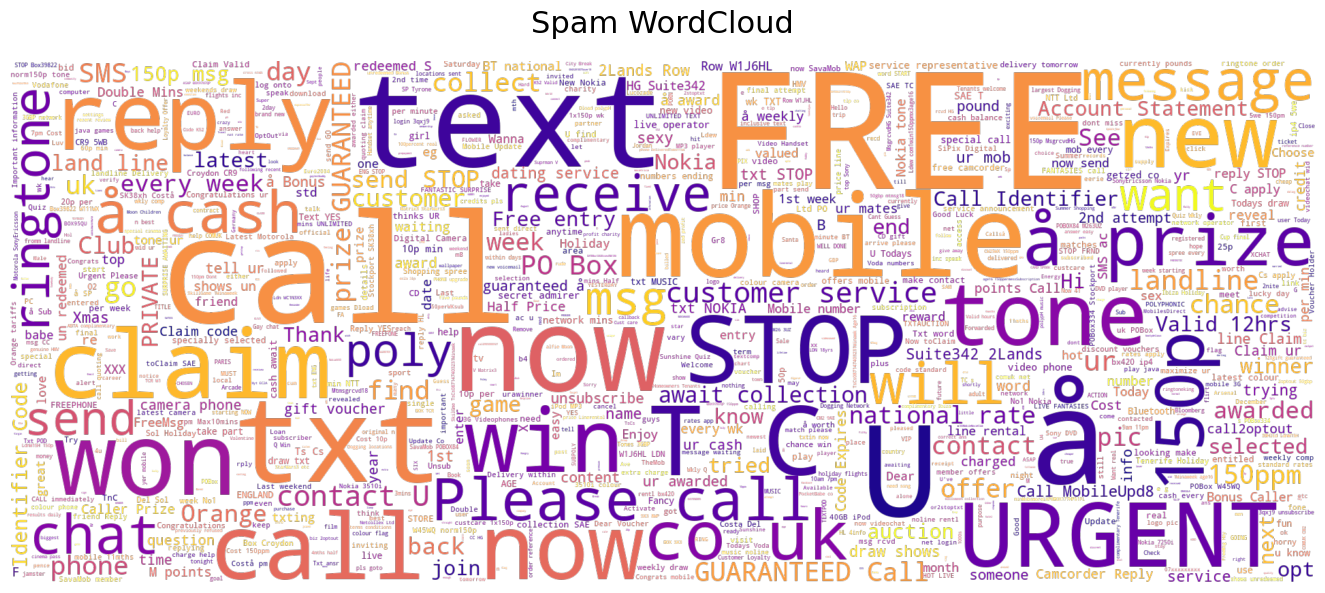

In [38]:
generate_wordcloud(spam, 'Spam WordCloud', colormap='plasma', save=True, filename='spam_wordcloud.png')